In [1]:
from rmgpy.molecule import Molecule, Atom, getElement
from rdkit.Chem import AllChem, Pharm3D

In [3]:
import os
import re
import logging
import external.cclib as cclib
import time
from subprocess import Popen
from copy import deepcopy
import numpy
import shutil
import math
import sqlite3 as lite

import rmgpy
#from rmgpy.data.kinetics.transitionstates import TransitionStates
from rmgpy.molecule import Molecule, Atom, getElement
#import rmgpy.molecule.
from rmgpy.species import Species, TransitionState
from rmgpy.reaction import Reaction
from rmgpy.kinetics import Arrhenius, Eckart
from rmgpy.statmech import Conformer, IdealGasTranslation, NonlinearRotor, HarmonicOscillator, LinearRotor
from qm.transitionstates import DistanceData, TransitionStateDepository, TSGroups, TransitionStates
from rmgpy.cantherm.main import CanTherm
from rmgpy.cantherm.kinetics import KineticsJob

In [4]:
from autotst.molecule import *
import autotst.conformer
from autotst.reaction import *
from autotst.conformer import *
from rmgpy.reaction import Reaction

thermo.py:789 loadLibraries INFO Loading thermodynamics library from primaryThermoLibrary.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:789 loadLibraries INFO Loading thermodynamics library from KlippensteinH2O2.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:789 loadLibraries INFO Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:789 loadLibraries INFO Loading thermodynamics library from CBS_QB3_1dHR.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:806 loadGroups INFO Loading thermodynamics group database from /Users/nathan/Code/RMG-database/input/thermo/groups...
transport.py:294 loadGroups INFO Loading transport group database from /Users/nathan/Code/RMG-database/input/transport/groups...
database.py:165 loadFamilies INFO Loading the user-specified kinetics families from /Users/nathan/Code/RMG-database/input/kinetics/famil

In [5]:
import py3Dmol

In [6]:
a = AutoTST_Reaction("OO+[CH2]CCCC_[O]O+CCCCC", "H_Abstraction")
a

reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 1 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 2 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 3 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 4 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 5 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 6 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 7 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 8 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 9 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 10 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 11 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 12 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 13 of 10000
reaction.py:389 rd_embed INFO RDKi

[Molecule(SMILES="OO"), Molecule(SMILES="[CH2]CCCC")]
[Reaction(reactants=[Molecule(SMILES="OO"), Molecule(SMILES="[CH2]CCCC")], products=[Molecule(SMILES="CCCCC"), Molecule(SMILES="[O]O")], pairs=[[Molecule(SMILES="OO"), Molecule(SMILES="[O]O")], [Molecule(SMILES="[CH2]CCCC"), Molecule(SMILES="CCCCC")]]), Reaction(reactants=[Molecule(SMILES="OO"), Molecule(SMILES="[CH2]CCCC")], products=[Molecule(SMILES="CCCCC"), Molecule(SMILES="[O]O")], pairs=[[Molecule(SMILES="OO"), Molecule(SMILES="[O]O")], [Molecule(SMILES="[CH2]CCCC"), Molecule(SMILES="CCCCC")]])]
<Molecule "OO"> + <Molecule "[CH2]CCCC"> <=> <Molecule "CCCCC"> + <Molecule "[O]O">


reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 95 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 96 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 97 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 98 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 99 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 100 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 101 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 102 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 103 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 104 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 105 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 106 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 107 of 10000
reaction.py:389 r

reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 203 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 204 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 205 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 206 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 207 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 208 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 209 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 210 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 211 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 212 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 213 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 214 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 215 of 10000
reaction.py:

reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 311 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 312 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 313 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 314 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 315 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 316 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 317 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 318 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 319 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 320 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 321 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 322 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 323 of 10000
reaction.py:

reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 419 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 420 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 421 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 422 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 423 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 424 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 425 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 426 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 427 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 428 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 429 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 430 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 431 of 10000
reaction.py:

reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 527 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 528 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 529 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 530 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 531 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 532 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 533 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 534 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 535 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 536 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 537 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 538 of 10000
reaction.py:389 rd_embed INFO RDKit failed to embed on attempt 539 of 10000
reaction.py:

<autotst.reaction.AutoTST_Reaction instance at 0x11a9725f0>

In [7]:
a.ts.view_ts()

In [8]:
rd_mol = react.toRDKitMol(removeHs=False)
rdkit.Chem.AllChem.EmbedMolecule(rd_mol)
a.ts.view_ts(rd_mol)

NameError: name 'react' is not defined

In [9]:
r1, r2 = a.rmg_reaction.reactants
r1 = r1.toRDKitMol(removeHs=False)
r2 = r2.toRDKitMol(removeHs=False)

combo = Chem.CombineMols(r1,r2)
rdkit.Chem.AllChem.EmbedMolecule(combo)
combo

In [10]:
a.ts.view_ts(combo)

In [11]:
r = Reaction(reactants=[Molecule(SMILES="OO"), Molecule(SMILES="[CH2]CCC")], products=[Molecule(SMILES="[O]O"),Molecule(SMILES="CCCC")])

In [12]:
reacts = rmg_database.kinetics.generateReactionsFromFamilies(r.reactants, r.products)
r1, r2 = reacts
r1

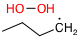

In [13]:
a, b = r1.reactants
merge = Molecule.merge(a,b)
merge

In [14]:
def view_ts(mol=None):
    """
    A method designed to create a 3D figure of the Multi_Molecule with py3Dmol
    """
    

    mb = Chem.MolToMolBlock(mol)
    p = py3Dmol.view(width=400, height=400)
    p.addModel(mb, "sdf")
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()

In [15]:
from autotst.reaction import *
rd_merge = merge.toRDKitMol(removeHs=False)
rdkit.Chem.AllChem.EmbedMolecule(rd_merge)
view_ts(rd_merge)


In [16]:
bm = rdkit.Chem.rdDistGeom.GetMoleculeBoundsMatrix(rd_merge)
bm

array([[  0.00000000e+00,   1.32600000e+00,   1.00025420e+00,
          1.93274314e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  1.30600000e+00,   0.00000000e+00,   1.93274314e+00,
          1.00025420e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  9.80254204e-01,   1.85274314e+00,   0.00000000e+00,
          2.71924694e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03

In [17]:
view_ts(rd_merge)

In [18]:
for reaction in reacts:
    print reaction
    # Check if any of the RMG proposed reactions matches the reaction in the mechanism
    if r.isIsomorphic(reaction):
        atom_labels_reactants = dict([(lbl[0], False) for lbl in reaction.labeledAtoms])
        atom_labels_products = dict([(lbl[0], False) for lbl in reaction.labeledAtoms])

        for reactant in reaction.reactants:
            reactant.clearLabeledAtoms()
            for atom in reactant.atoms:
                for atom_label in reaction.labeledAtoms:
                    if atom == atom_label[1]:
                        atom.label = atom_label[0]
                        atom_labels_reactants[atom_label[0]] = True

        for product in reaction.products:
            product.clearLabeledAtoms()
            for atom in product.atoms:
                for atom_label in reaction.labeledAtoms:
                    if atom == atom_label[1]:
                        atom.label = atom_label[0]
                        atom_labels_products[atom_label[0]] = True

        if all(atom_labels_reactants.values()) and all(atom_labels_products.values()):
            # We successfully labeled all of the atoms
            break
reaction

<Molecule "OO"> + <Molecule "[CH2]CCC"> <=> <Molecule "CCCC"> + <Molecule "[O]O">


In [19]:
data = ts_database.groups.estimateDistancesUsingGroupAdditivity(r1)
data

DistanceData(distances={'d12': 1.158368,'d13': 2.529563,'d23': 1.378396,}, uncertainties={'d12': 0.302302,'d13': 0.208863,'d23': 0.385131,}, comment=u'Matched node OOH ([<Entry index=29 label="OOH">, <Entry index=261 label="Cdj_CddH">])\nMatched node Csj/Cs/H2 ([<Entry index=119 label="C/H3/Cd">, <Entry index=208 label="Csj/Cs/H2">])\n')

In [20]:
d12 = data.distances["d12"]
d13 = data.distances["d13"]
d23 = data.distances["d23"]

In [21]:
lbl1 = merge.getLabeledAtom("*1").sortingLabel
lbl2 = merge.getLabeledAtom("*2").sortingLabel
lbl3 = merge.getLabeledAtom("*3").sortingLabel

In [22]:
bm

array([[  0.00000000e+00,   1.32600000e+00,   1.00025420e+00,
          1.93274314e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  1.30600000e+00,   0.00000000e+00,   1.93274314e+00,
          1.00025420e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  9.80254204e-01,   1.85274314e+00,   0.00000000e+00,
          2.71924694e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03

In [24]:
blem = Molecule.merge(reaction.reactants[0], reaction.reactants[1])
mol = blem.toRDKitMol(removeHs=False)
mol

In [25]:
if reaction.family.lower() in ['h_abstraction', 'r_addition_multiplebond', 'intra_h_migration']:
    lbl1 = blem.getLabeledAtom('*1').sortingLabel
    lbl2 = blem.getLabeledAtom('*2').sortingLabel
    lbl3 = blem.getLabeledAtom('*3').sortingLabel
elif reaction.family.lower() in ['disproportionation']:
    lbl1 = blem.getLabeledAtom('*2').sortingLabel
    lbl2 = blem.getLabeledAtom('*4').sortingLabel
    lbl3 = blem.getLabeledAtom('*1').sortingLabel

labels = [lbl1, lbl2, lbl3]
atomMatch = ((lbl1,),(lbl2,),(lbl3,))

labels, atomMatch

([0, 2, 3], ((0,), (2,), (3,)))

In [26]:
len(blem.atoms)

17

In [27]:
def setLimits(bm, lbl1, lbl2, value, uncertainty):
    if lbl1 > lbl2:
        bm[lbl2][lbl1] = value + uncertainty/2
        bm[lbl1][lbl2] = max(0,value - uncertainty/2)
    else:
        bm[lbl2][lbl1] = max(0,value - uncertainty/2)
        bm[lbl1][lbl2] = value + uncertainty/2

    return bm

In [28]:
bm = rdkit.Chem.rdDistGeom.GetMoleculeBoundsMatrix(mol)
bm

array([[  0.00000000e+00,   1.32600000e+00,   1.00025420e+00,
          1.93274314e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  1.30600000e+00,   0.00000000e+00,   1.93274314e+00,
          1.00025420e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  9.80254204e-01,   1.85274314e+00,   0.00000000e+00,
          2.71924694e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03

In [29]:
bm.shape

(17, 17)

In [30]:
lbl1, lbl2, lbl3 = labels

uncertainties = {'d12':0.02, 'd13':0.02, 'd23':0.02 } # distanceData.uncertainties or {'d12':0.1, 'd13':0.1, 'd23':0.1 } # default if uncertainty is None
bm = setLimits(bm, lbl1, lbl2, data.distances['d12'], uncertainties['d12'])
bm = setLimits(bm, lbl2, lbl3, data.distances['d23'], uncertainties['d23'])
bm = setLimits(bm, lbl1, lbl3, data.distances['d13'], uncertainties['d13'])
bm

array([[  0.00000000e+00,   1.32600000e+00,   1.16836800e+00,
          2.53956300e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  1.30600000e+00,   0.00000000e+00,   1.93274314e+00,
          1.00025420e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  1.14836800e+00,   1.85274314e+00,   0.00000000e+00,
          1.38839600e+00,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03

In [31]:
def optimize( rdmol, boundsMatrix=None, atomMatch=None):
    """

    Optimizes the rdmol object using UFF.
    Determines the energy level for each of the conformers identified in rdmol.GetConformer.


    :param rdmol:
    :param boundsMatrix:
    :param atomMatch:
    :return rdmol, minEid (index of the lowest energy conformer)
    """

    energy=0.0
    minEid=0;
    lowestE=9.999999e99;#start with a very high number, which would never be reached
    crude = Chem.Mol(rdmol.ToBinary())

    for conf in rdmol.GetConformers():
        if boundsMatrix is None:
            AllChem.UFFOptimizeMolecule(rdmol,confId=conf.GetId())
            energy=AllChem.UFFGetMoleculeForceField(rdmol,confId=conf.GetId()).CalcEnergy()
        else:
            eBefore, energy = Pharm3D.EmbedLib.OptimizeMol(rdmol, boundsMatrix, atomMatches=atomMatch, forceConstant=100000.0)

        if energy < lowestE:
            minEid = conf.GetId()
            lowestE = energy

    return rdmol, minEid

In [32]:
def rd_embed(rdmol, numConfAttempts, bm=None, match=None):
    """
    Embed the RDKit molecule and create the crude molecule file.
    """
    if bm is None: #bm = bounds matrix?
        AllChem.EmbedMultipleConfs(rdmol, numConfAttempts ,randomSeed=1)
        crude = Chem.Mol(rdmol.ToBinary())
        rdmol, minEid = optimize(rdmol)
    else:
        """
        Embed the molecule according to the bounds matrix. Built to handle possible failures
        of some of the embedding attempts.
        """
        rdmol.RemoveAllConformers()
        for i in range(0,numConfAttempts):
            try:
                Pharm3D.EmbedLib.EmbedMol(rdmol, bm, atomMatch=match)
                break
            except ValueError:
                logging.info("RDKit failed to embed on attempt {0} of {1}".format(i + 1, numConfAttempts))
                # What to do next (what if they all fail?) !!!!!
            except RuntimeError:
                raise RDKitFailedError()
        else:
            logging.error("RDKit failed all attempts to embed")
            return None, None

        """
        RDKit currently embeds the conformers and sets the id as 0, so even though multiple
        conformers have been generated, only 1 can be called. Below the id's are resolved.
        """
        for i in range(len(rdmol.GetConformers())):
            rdmol.GetConformers()[i].SetId(i)

        crude = Chem.Mol(rdmol.ToBinary())
        rdmol, minEid = optimize(rdmol, boundsMatrix=bm, atomMatch=match)

    return rdmol, minEid

In [33]:
from rdkit.Chem import AllChem, Pharm3D
new_mol, min_e = rd_embed(mol, 1000, bm, atomMatch)
new_mol

<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 1 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 2 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 3 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 4 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 5 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 6 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 7 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 8 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 9 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attempt 10 of 1000
<ipython-input-32-faebb11cc81e>:20 rd_embed INFO RDKit failed to embed on attem

In [34]:


mol_list = AllChem.MolToMolBlock(new_mol).split('\n')
ase_atoms = []
for i, line in enumerate(mol_list):

    if i > 3:

        try:
            atom0, atom1, bond, rest = line
            atom0 = int(atom0)
            atom0 = int(atom1)
            bond = float(bond)

        except ValueError:
            try:
                x, y, z, symbol = line.split()[0:4]
                x = float(x)
                y = float(y)
                z = float(z)
                # print symbol

                ase_atoms.append(Atom(symbol=symbol, position=(x, y, z)))

            except:
                continue

view_mol = Atoms(ase_atoms)
view_mol

Atoms(symbols='O2H2C4H9', pbc=False)

In [36]:
from ase.visualize import view
view(view_mol, viewer='x3d')

In [37]:
ts = TransitionStates()
"""ts.groups = groups
ts.depository = training"""
ts.family = rmg_database.kinetics.families.values()[0]

ts.load(path, local_context, global_context)

transitionstates.py:127 load INFO Loading transitions state family groups from database/H_Abstraction/TS_groups.py


In [38]:
e = ts.groups.descendTree(r1.reactants[0], r1.reactants[0].getLabeledAtoms())
a = e.data
a.distances

{'d12': -0.122509, 'd13': -0.10007, 'd23': 0.022031}

In [39]:
from rmgpy.species import Species, TransitionState

In [40]:
from rmgpy.statmech import Conformer, IdealGasTranslation, NonlinearRotor, HarmonicOscillator, LinearRotor

In [42]:

from rmgpy.data.base import *

In [45]:
import os
import re
import logging
import external.cclib as cclib
import time
from subprocess import Popen
from copy import deepcopy
import numpy
import shutil
import math
import sqlite3 as lite

import rmgpy
from rmgpy.data.kinetics.transitionstates import TransitionStates
from rmgpy.molecule import Molecule, Atom, getElement
from rmgpy.species import Species, TransitionState
from rmgpy.reaction import Reaction
from rmgpy.kinetics import Arrhenius, Eckart
from rmgpy.statmech import Conformer, IdealGasTranslation, NonlinearRotor, HarmonicOscillator, LinearRotor

from qm.transitionstates import DistanceData, TransitionStateDepository, TSGroups, TransitionStates
from rmgpy.cantherm.main import CanTherm
from rmgpy.cantherm.kinetics import KineticsJob


In [46]:
family = "H_Abstraction"

global_context = { '__builtins__': None }
local_context={'DistanceData': DistanceData}
path = "database/" + family

fpath = os.path.join(path,'TS_training', 'reactions.py')

training = TransitionStateDepository(label='H_Abstraction/TS_training')
training.load(fpath, local_context, global_context )

groups = TSGroups()
groups.load(os.path.join(path, "TS_groups.py"), local_context, global_context)
groups.label = family
groups.entries

OrderedDict([('X_H_or_Xrad_H_Xbirad_H_Xtrirad_H',
              <Entry index=1 label="X_H_or_Xrad_H_Xbirad_H_Xtrirad_H">),
             ('Y_rad_birad_trirad_quadrad',
              <Entry index=2 label="Y_rad_birad_trirad_quadrad">),
             ('H2', <Entry index=3 label="H2">),
             ('C_H', <Entry index=4 label="C_H">),
             ('Cs_H', <Entry index=9 label="Cs_H">),
             ('Csnorad_H', <Entry index=21 label="Csnorad_H">),
             ('C_methane', <Entry index=43 label="C_methane">),
             ('CsRHHH', <Entry index=44 label="CsRHHH">),
             ('CsCHHH', <Entry index=77 label="CsCHHH">),
             ('C/H3/Cs', <Entry index=118 label="C/H3/Cs">),
             ('C/H3/Cd', <Entry index=119 label="C/H3/Cd">),
             ('C/H3/Ct', <Entry index=120 label="C/H3/Ct">),
             ('C/H3/Cb', <Entry index=121 label="C/H3/Cb">),
             ('CsOHHH', <Entry index=78 label="CsOHHH">),
             ('CsRRHH', <Entry index=45 label="CsRRHH">),
         

In [50]:
from rmgpy.data.rmg import RMGDatabase
rxnFamilies = ["H_Abstraction"]
rmgDatabase = RMGDatabase()
databasePath = os.path.abspath(os.path.join(os.getenv('RMGpy', '..'), '..', 'RMG-database', 'input'))
logging.info(databasePath)
rmgDatabase.load(databasePath,
                 kineticsFamilies=rxnFamilies,
                 transportLibraries=[],
                 reactionLibraries=[],
                 seedMechanisms=[],
                 thermoLibraries=['primaryThermoLibrary', 'KlippensteinH2O2', 'thermo_DFT_CCSDTF12_BAC', 'CBS_QB3_1dHR' ],
                 solvation=False,
                 )

rmg.py:72 __init__ WARNING Should only make one instance of RMGDatabase because it's stored as a module-level variable!
rmg.py:73 __init__ WARNING Unexpected behaviour may result!
<ipython-input-50-6556652b0d4d>:5 <module> INFO /Users/nathan/Code/RMG-database/input
thermo.py:789 loadLibraries INFO Loading thermodynamics library from primaryThermoLibrary.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:789 loadLibraries INFO Loading thermodynamics library from KlippensteinH2O2.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:789 loadLibraries INFO Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:789 loadLibraries INFO Loading thermodynamics library from CBS_QB3_1dHR.py in /Users/nathan/Code/RMG-database/input/thermo/libraries...
thermo.py:806 loadGroups INFO Loading thermodynamics group database from /Users/nathan/Code/RMG-database/input/thermo/groups...

In [51]:
import cPickle as pkl
f = open("./autotst/ts_database.pkl", "r")
ts_database = pkl.load(f)
ts_database

<rmgpy.data.kinetics.transitionstates.TransitionStates instance at 0x1205f7440>

In [52]:
from rmgpy.data.kinetics.family import *
from rmgpy.kinetics import *
from rmgpy.kinetics.arrhenius import ArrheniusEP


In [53]:
local_context["ArrheniusEP"] = ArrheniusEP
local_context["Arrhenius"] = Arrhenius

In [54]:
k = KineticsFamily()
k.load("/Users/nathan/Code/RMG-database/input/kinetics/families/H_Abstraction/", local_context, global_context)

In [55]:
k.generateReactions(r.reactants)
#ts.estimateDistances()

ReactionPairsError: Unable to determine reaction pairs for  reaction <Molecule "OO"> + <Molecule "[CH2]CCC"> <=> <Molecule "[O]O"> + <Molecule "CCCC">.

In [56]:
e1 = ts.groups.top[0]
e1.children

[<Entry index=3 label="H2">,
 <Entry index=4 label="C_H">,
 <Entry index=5 label="O_H">]

In [57]:
rmgDatabase.kinetics.families.values()[0]

<ReactionFamily "H_Abstraction">

In [58]:
c = ts.groups.top[0].item
atomList = c.getPossibleStructures(ts.groups.entries)[0].getLabeledAtoms()
for reactant in b.reactants:
    if isinstance(reactant, Species):
        reactant = reactant.molecule[0]
    # Match labeled atoms
    # Check this reactant has each of the atom labels in this group
    if not all([reactant.containsLabeledAtom(label) for label in atomList]):
        continue # don't try to match this structure - the atoms aren't there!
    # Match structures
    atoms = reactant.getLabeledAtoms()
    
atoms

AttributeError: 'rmgpy.molecule.molecule.Molecule' object has no attribute 'reactants'

In [59]:
global_context = { '__builtins__': None }
local_context={'DistanceData': DistanceData}
path = "../RMG-database/input/kinetics/families/H_Abstraction/"
fpath = os.path.join(path,'TS_training', 'reactions.py')
depository = TransitionStateDepository(label='H_Abstraction/TS_training')
depository.load(fpath, local_context, global_context )

In [60]:
e = depository.entries['1:H + C3H4 <=> H2 + C3H3']
from rmgpy.data.kinetics.family import KineticsFamily

In [61]:
TransitionStates().load("../RMG-database/input/kinetics/families/H_Abstraction/", 
                        global_context = { '__builtins__': None },
                        local_context={'DistanceData': DistanceData}
                       )

AttributeError: 'NoneType' object has no attribute 'forwardTemplate'

In [62]:
k = KineticsFamily()
k.load("/Users/nathan/Code/RMG-database/input/kinetics/families/H_Abstraction/")

TypeError: 'NoneType' object does not support item assignment

In [63]:
def loadTSDataFile(filePath):
    """
    Load the specified transition state data file and return the dictionary of its contents.

    Returns `None` if the file is invalid or missing.

    Checks that the returned dictionary contains at least rxnLabel, method, qmData.
    """

    if not os.path.exists(filePath):
        return None
    try:
        with open(filePath) as resultFile:
            logging.info('Reading existing ts file {0}'.format(filePath))
            global_context = { '__builtins__': None }
            local_context = {
                '__builtins__': None,
                'True': True,
                'False': False,
                #'QMData': qmdata.QMData,
                'array': numpy.array,
                'int32': numpy.int32,
                'entry': rmgpy.data.base.Entry,
                'DistanceData': DistanceData
                #'distances': dict
            }
            exec resultFile in global_context, local_context
    except IOError, e:
        logging.info("Couldn't read ts file {0}".format(filePath))
        return None
    except (NameError, TypeError, SyntaxError), e:
        logging.error('The ts file "{0}" was invalid:'.format(filePath))
        logging.exception(e)
        return None
    """if not 'rxnLabel' in local_context:
        logging.error('The ts file "{0}" did not contain a rxnLabel.'.format(filePath))
        return None
    if not 'method' in local_context:
        logging.error('The ts file "{0}" did not contain a method.'.format(filePath))
        return None
    if not 'qmData' in local_context:
        logging.error('The ts file "{0}" did not contain thermoData.'.format(filePath))
        return None"""
    return local_context

In [64]:
loadTSDataFile("../RMG-database/input/kinetics/families/H_Abstraction/TS_groups.py")

<ipython-input-63-08ec4f627cd5>:14 loadTSDataFile INFO Reading existing ts file ../RMG-database/input/kinetics/families/H_Abstraction/TS_groups.py
<ipython-input-63-08ec4f627cd5>:32 loadTSDataFile ERROR The ts file "../RMG-database/input/kinetics/families/H_Abstraction/TS_groups.py" was invalid:
<ipython-input-63-08ec4f627cd5>:33 loadTSDataFile ERROR __init__() got an unexpected keyword argument 'distances'
Traceback (most recent call last):
  File "<ipython-input-63-08ec4f627cd5>", line 27, in loadTSDataFile
    exec resultFile in global_context, local_context
  File "../RMG-database/input/kinetics/families/H_Abstraction/TS_groups.py", line 628, in <module>
    """,
TypeError: __init__() got an unexpected keyword argument 'distances'


In [65]:
db = Database()

In [66]:
from qm.transitionstates import DistanceData
f = open("../RMG-database/input/kinetics/families/H_Abstraction/TS_groups.py", "r").read()
local_context = {
            'entry': rmgpy.data.base.Entry,
            #'distances': DistanceData
        }

exec f in local_context

NameError: name 'DistanceData' is not defined

In [67]:

db.load("../RMG-database/input/kinetics/families/H_Abstraction/TS_groups.py",
        global_context = { '__builtins__': None },
        local_context = {
            'entry': rmgpy.data.base.Entry,
            'distances': DistanceData
        }
       )

AttributeError: Database instance has no attribute 'loadEntry'

In [ ]:
rmgpy.qm.molecule.Geometry?